In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

data_dir ='data'

# Question 2.1 - Load Data

Download prostate data from https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Take x1 = lcavol, x2 = lweight, x3 = age, x4 = lbph, x5 = svi, x6 = lcp, x7 = gleason, x8 = pgg45,
and define the response variable y = lpsa. Standardize all variables. Show the 8 scatter plot of y against each x1, . . . , x8

In [2]:
prostate_df = pd.read_csv(os.path.join(data_dir, 'prostate.data'),sep='\t', index_col=0)
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


We don't need train so we drop it

In [3]:
prostate_df = prostate_df.drop('train', axis=1)
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [4]:
var_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']
prostate_df = prostate_df.reset_index(drop=True)
prostate_df.columns = var_names
prostate_df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


Standardize

In [5]:
from sklearn.preprocessing import StandardScaler

prostate_df.iloc[:,:] = StandardScaler().fit_transform(prostate_df.values)

prostate_df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.834631
...,...,...,...,...,...,...,...,...,...
92,1.262444,0.580608,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,1.660415
93,2.107397,0.628738,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,1.921044
94,1.328267,-0.546127,-1.602073,-1.030029,1.902379,1.900197,0.344407,-0.512556,2.320465
95,1.307045,0.340141,0.558151,1.010033,1.902379,1.249088,0.344407,1.982251,2.611649


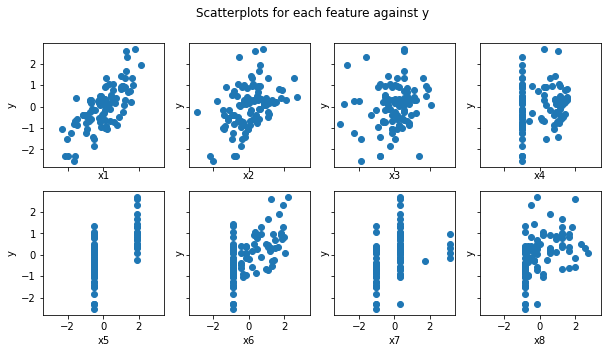

In [16]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize = (10, 5))

for i, ax in enumerate(axs.flat):
    ax.scatter(prostate_df.iloc[:,i], prostate_df.iloc[:,-1])
    ax.set_xlabel(prostate_df.columns[i])
    ax.set_ylabel(prostate_df.columns[-1])
    
fig.suptitle('Scatterplots for each feature against y')
plt.show()

In [13]:
prostate_df.to_pickle(os.path.join(data_dir, 'prostate_df.pkl'))

# Question 2.2

Use a Markov chain Monte Carlo sampler to take samples from the posterior of w in Question 1 over this data set and visualize your samples, do they converge?


In [26]:
prostate_df = pd.read_pickle(os.path.join(data_dir, 'prostate_df.pkl'))

## Find estimation of $\lambda$ and $\sigma^2$ using least squares

In [36]:
from sklearn.linear_model import LinearRegression

X,y = prostate_df.drop('y', axis=1), prostate_df['y']
lr = LinearRegression(fit_intercept=False).fit(X,y)

$\sigma^2=(\Sigma_{i=1}^n(\hat{y_i}-y_i)^2)/(n-1)$

In [42]:
var_y = np.square(lr.predict(X) - y).sum()/(y.size - 1)

$\lambda=(\Sigma_{i=1}^N(w_i)^2)/(N-1)$

In [43]:
w = lr.coef_
lam = np.square(w).sum()/(w.size - 1)

In [45]:
print(var_y, lam)

0.34011679319379495 0.0746875038667315


# Question 2.4

In [17]:
prostate_df = pd.read_pickle(os.path.join(data_dir, 'prostate_df.pkl'))


In [20]:
from sklearn.decomposition import PCA

prostate_pc = PCA().fit_transform(prostate_df.drop('y', axis=1))

In [21]:
prostate_pc.shape

(97, 8)

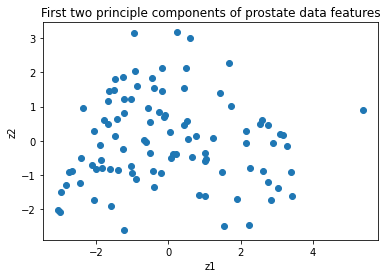

In [25]:
plt.scatter(prostate_pc[:, 0], prostate_pc[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('First two principle components of prostate data features')
plt.show()